In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/breast-cancer-wisconsin.csv', header=None)
df = df[(df[6]!='?')].astype('float')
del df[0]
n = 1

In [5]:
df

,1,2,3,4,5,6,7,8,9,10
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
7,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
8,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0
9,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [3]:
data_matrix = df.as_matrix()

features = data_matrix[:,0:-1]
features = np.c_[np.ones(features.shape[0]), features]

labels = data_matrix[:,-1]
labels[labels==2] = 1
labels[labels==4] = -1

In [4]:
def percp(X, Y, nb_epoch=1):
    w = np.zeros(X.shape[1])
    for epoch in range(nb_epoch):
        for x,y in zip(X,Y):
            if y*np.dot(x,w)<=0:
                w = w+y*x
    return w

def p_predict(w, X):
    predictions = []
    for x in X:
        predictions.append(sign(np.dot(w, x)))
    return predictions

def sign(x):
    if x<0:
        return -1
    return 1

def accuracy(predictions, labels):
    acc = np.sum((predictions==labels)).astype('float')/len(predictions)    
    return acc
def pred_n_acc2(w,X,labels,predictions=None):
    predictions = p_predict(w,X)
    acc = accuracy(predictions,labels)
    return predictions,acc

In [5]:
X = features
y = labels
kf = KFold(n_splits=10)
fold = 0
num = 1
count = 0
Ap = []
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    for epoch in xrange(10,55,5):
        v1 = percp(X_train,y_train, nb_epoch=epoch)
        pred,acc = pred_n_acc2(v1,X_test,y_test)
        print("{}.Fold:{}    Epoch:{}    acc:{}".format(num,fold+1,epoch,round(acc,4)))
        Ap.append(acc)
        count+=1
    print("========    ========    ==========")
    
    fold+=1
    num+=1

1.Fold:1    Epoch:10    acc:0.971
1.Fold:1    Epoch:15    acc:0.9275
1.Fold:1    Epoch:20    acc:0.9275
1.Fold:1    Epoch:25    acc:0.971
1.Fold:1    Epoch:30    acc:0.942
1.Fold:1    Epoch:35    acc:0.9565
1.Fold:1    Epoch:40    acc:0.942
1.Fold:1    Epoch:45    acc:0.913
1.Fold:1    Epoch:50    acc:0.971
========    ========    ==========
2.Fold:2    Epoch:10    acc:0.942
2.Fold:2    Epoch:15    acc:0.9275
2.Fold:2    Epoch:20    acc:0.9275
2.Fold:2    Epoch:25    acc:0.971
2.Fold:2    Epoch:30    acc:0.9565
2.Fold:2    Epoch:35    acc:0.9565
2.Fold:2    Epoch:40    acc:0.971
2.Fold:2    Epoch:45    acc:0.971
2.Fold:2    Epoch:50    acc:0.9855
========    ========    ==========
3.Fold:3    Epoch:10    acc:0.971
3.Fold:3    Epoch:15    acc:0.9855
3.Fold:3    Epoch:20    acc:0.9855
3.Fold:3    Epoch:25    acc:0.9855
3.Fold:3    Epoch:30    acc:0.9565
3.Fold:3    Epoch:35    acc:0.9565
3.Fold:3    Epoch:40    acc:0.9855
3.Fold:3    Epoch:45    acc:0.9855
3.Fold:3    Epoch:50    acc:0.9

In [6]:
def vpercp(X, Y, nb_epoch=1,kfold=10):
    w1 = np.zeros(features.shape[1])
    c1 = 1
    v1 = []
    p1 = []    
    for epoch in range(nb_epoch):
        for x,y in zip(X,Y):
            u = np.inner(x,w1)
            if y*u<=0:
                v1.append(w1)
                p1.append(c1)
                w1 = w1+y*x
                c1 = 1
            else:
                c1 =c1+1
    return v1,p1

def sign(x):
    if x<0:
        return -1
    return 1

def  vp_predict(v, p, X):
    predictions = []
    for x in X:
        s  = 0
        for w,c in zip(v,p):
            s = s + c*sign(np.dot(w,x))
        predictions.append(sign(s))
    return predictions

def accuracy(predictions, labels):
    acc = np.sum((predictions==labels)).astype('float')/len(predictions)    
    return acc

def pred_n_acc(v,p,X,labels,predictions=None):
    predictions = vp_predict(v,p,X)
    acc = accuracy(predictions,labels)
    return predictions,acc

In [7]:
X = features
y = labels
kf = KFold(n_splits=10)
fold = 0
num = 1
Av = []
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    for epoch in xrange(10,55,5):
        v1,p1 = vpercp(X_train, y_train, nb_epoch=epoch)
#         print v1
        pred,acc = pred_n_acc(v1,p1,X_test,y_test)
        print("{}.Fold:{}    Epoch:{}    acc:{}".format(num,fold+1,epoch,round(acc,4)))
        Av.append(acc)
    print("========    ========    ==========")
    
    fold+=1
    num+=1
    
    

1.Fold:1    Epoch:10    acc:0.8986
1.Fold:1    Epoch:15    acc:0.913
1.Fold:1    Epoch:20    acc:0.913
1.Fold:1    Epoch:25    acc:0.913
1.Fold:1    Epoch:30    acc:0.913
1.Fold:1    Epoch:35    acc:0.8986
1.Fold:1    Epoch:40    acc:0.8986
1.Fold:1    Epoch:45    acc:0.8841
1.Fold:1    Epoch:50    acc:0.8986
========    ========    ==========
2.Fold:2    Epoch:10    acc:0.9275
2.Fold:2    Epoch:15    acc:0.942
2.Fold:2    Epoch:20    acc:0.942
2.Fold:2    Epoch:25    acc:0.9565
2.Fold:2    Epoch:30    acc:0.9565
2.Fold:2    Epoch:35    acc:0.9565
2.Fold:2    Epoch:40    acc:0.971
2.Fold:2    Epoch:45    acc:0.971
2.Fold:2    Epoch:50    acc:0.971
========    ========    ==========
3.Fold:3    Epoch:10    acc:0.9855
3.Fold:3    Epoch:15    acc:0.9855
3.Fold:3    Epoch:20    acc:0.9855
3.Fold:3    Epoch:25    acc:0.9855
3.Fold:3    Epoch:30    acc:0.9855
3.Fold:3    Epoch:35    acc:0.9855
3.Fold:3    Epoch:40    acc:0.9855
3.Fold:3    Epoch:45    acc:0.9855
3.Fold:3    Epoch:50    acc:0

In [8]:
Av = np.array(Av)
Av = np.reshape(Av,[10,9])
Avm = np.mean(Av,axis=0)

Ap = np.array(Ap)
Ap = np.reshape(Ap,[10,9])
Apm = np.mean(Ap,axis=0)  

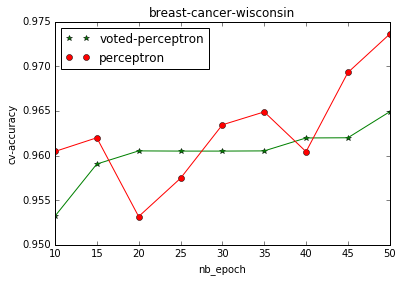

In [9]:
x = range(10,55,5)
#fig = plt.figure()
plt.plot(x,Avm,'g*',label = "voted-perceptron")
plt.plot(x,Avm,'g')
plt.plot(x,Apm,'ro', label = "perceptron")
plt.plot(x,Apm,'r')
plt.title("breast-cancer-wisconsin")
    
plt.xlabel("nb_epoch")
plt.ylabel("cv-accuracy")

plt.legend(loc='upper left')
#plt.show()
plt.savefig("bcresult")